<a href="https://colab.research.google.com/github/SenolIsci/finance_portfolio_optimization_deep_learning_transformers/blob/main/SP500_Portfolio_Optimization_KERAS_TUNER_DEEP_LEARNING_MODELS_FINE_TUNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('gdrive/My Drive/projects/timeseries')
!ls

Mounted at /content/gdrive
'BIST Portfolio Optimization'
 black_litterman.ipynb
 blackwell_littermann_lab_23.ipynb
 data
 databist
 databistall_stocks_5yr.csv
 data_plain
'Hidden Markov Model.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
 model_checkpoint.h5
 my_dir
'PCA.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
'Portfolio Optimization.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
'Q-Learning Trader.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
'Regression-Based Strategy 0-1.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
 sp500_close.csv
'SP500 Portfolio Optimization'
'SP500 Portfolio Optimization DEEP LEARNING MODELS FINE TUNUNG'
 sp500sub.csv
'Trend-Following Revisited.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
'Trend Following Strategy SMA.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
 ts_stck_prt1
 ts_stck_prt10
 ts_stck_prt11
 ts_stck_prt12
 ts_stck_prt2
 ts_stck_prt3
 ts_stck_prt4
 ts_stck_prt5
 ts

data source

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=INTC&outputsize=full&apikey=S7ZA74J04RY49JPY&datatype=csv https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=TSLA&outputsize=full&apikey=S7ZA74J04RY49JPY&datatype=csv https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=LON.IAG&outputsize=full&apikey=S7ZA74J04RY49JPY&datatype=csv



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)

In [3]:
os.listdir('./data')


['daily_adjusted_TSLA.csv',
 'daily_adjusted_INTC.csv',
 'daily_adjusted_AMD.csv',
 'daily_adjusted_AAPL.csv',
 'daily_adjusted_MSFT.csv',
 'daily_adjusted_GOOG.csv',
 'daily_adjusted_FB.csv',
 'daily_adjusted_IBM.csv',
 'airline_passengers.csv',
 'daily_adjusted_SPY500.csv',
 'daily_adjusted_BNTX.csv',
 'daily_adjusted_NIO.csv',
 'daily_adjusted_SRNE.csv',
 'daily_adjusted_CVAC.csv',
 'daily_adjusted_MRNA.csv',
 'daily_adjusted_IQQH.csv',
 'all_stocks_5yr.csv',
 'sp500_close.csv']

In [4]:
sym_list=[i.split('_')[2].split('.')[0] for i in os.listdir('./data') if i.split('_')[0]=='daily']
sym_list

['TSLA',
 'INTC',
 'AMD',
 'AAPL',
 'MSFT',
 'GOOG',
 'FB',
 'IBM',
 'SPY500',
 'BNTX',
 'NIO',
 'SRNE',
 'CVAC',
 'MRNA',
 'IQQH']

In [5]:
df_all=pd.DataFrame({})
for i in os.listdir('./data'):
  if i.split('_')[0]=='daily':
    sym=i.split('_')[2].split('.')[0]   
    df=pd.read_csv(''.join(["./data/", str(i)]),names=["timestamp",	"open",	"high",	"low",	"close",	"adjusted_close",	"volume",	"dividend_amount",	"split_coefficient"],header=0, thousands=',')
    df.columns=["date",	"open",	"high",	"low",	"close",	"adjusted_close",	"volume",	"dividend_amount",	"split_coefficient"]
    df['Name']=sym
    df=df.iloc[::-1].reset_index(drop=True)


    df_all=pd.concat([df_all,df],axis=0)
df_all['date']=df_all['date'].apply(pd.to_datetime)
df_all=df_all.set_index('date',drop=True)
df_all.to_csv('./data/'+'all_stocks_5yr.csv',index=True)
df_all.columns

Index(['open', 'high', 'low', 'close', 'adjusted_close', 'volume',
       'dividend_amount', 'split_coefficient', 'Name'],
      dtype='object')

In [6]:
selected_column=['adjusted_close']

In [7]:

df_all

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,Name
date,,,,,,,,,
2010-06-29,19.000,25.0000,17.540,23.890,4.778,18766300,0.0,1.0,TSLA
2010-06-30,25.790,30.4192,23.300,23.830,4.766,17187100,0.0,1.0,TSLA
2010-07-01,25.000,25.9200,20.270,21.960,4.392,8218800,0.0,1.0,TSLA
2010-07-02,23.000,23.1000,18.710,19.200,3.840,5139800,0.0,1.0,TSLA
2010-07-06,20.000,20.0000,15.830,16.110,3.222,6866900,0.0,1.0,TSLA
...,...,...,...,...,...,...,...,...,...
2020-12-04,10.900,10.9280,10.780,10.892,10.892,0,0.0,0.0,IQQH
2020-12-07,10.968,11.0280,10.894,10.950,10.950,0,0.0,0.0,IQQH
2020-12-08,11.010,11.1900,10.972,11.182,11.182,0,0.0,0.0,IQQH


In [8]:
symbols = df_all['Name'].unique().tolist()
symbols

['TSLA',
 'INTC',
 'AMD',
 'AAPL',
 'MSFT',
 'GOOG',
 'FB',
 'IBM',
 'SPY500',
 'BNTX',
 'NIO',
 'SRNE',
 'CVAC',
 'MRNA',
 'IQQH']

In [9]:
df=df_all
df

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,Name
date,,,,,,,,,
2010-06-29,19.000,25.0000,17.540,23.890,4.778,18766300,0.0,1.0,TSLA
2010-06-30,25.790,30.4192,23.300,23.830,4.766,17187100,0.0,1.0,TSLA
2010-07-01,25.000,25.9200,20.270,21.960,4.392,8218800,0.0,1.0,TSLA
2010-07-02,23.000,23.1000,18.710,19.200,3.840,5139800,0.0,1.0,TSLA
2010-07-06,20.000,20.0000,15.830,16.110,3.222,6866900,0.0,1.0,TSLA
...,...,...,...,...,...,...,...,...,...
2020-12-04,10.900,10.9280,10.780,10.892,10.892,0,0.0,0.0,IQQH
2020-12-07,10.968,11.0280,10.894,10.950,10.950,0,0.0,0.0,IQQH
2020-12-08,11.010,11.1900,10.972,11.182,11.182,0,0.0,0.0,IQQH


In [10]:
symbols

['TSLA',
 'INTC',
 'AMD',
 'AAPL',
 'MSFT',
 'GOOG',
 'FB',
 'IBM',
 'SPY500',
 'BNTX',
 'NIO',
 'SRNE',
 'CVAC',
 'MRNA',
 'IQQH']

In [11]:
daterange=df_all.index.unique().sort_values()

In [12]:
daterange


DatetimeIndex(['1999-11-01', '1999-11-02', '1999-11-03', '1999-11-04',
               '1999-11-05', '1999-11-08', '1999-11-09', '1999-11-10',
               '1999-11-11', '1999-11-12',
               ...
               '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10'],
              dtype='datetime64[ns]', name='date', length=5350, freq=None)

In [13]:
close_prices = pd.DataFrame(index=daterange)

In [14]:
# Let's now fill in our close prices dataframe
for symbol in symbols:
  df_sym = df[df['Name'] == symbol]

  df_tmp = df_sym[selected_column]
  df_tmp.columns=[symbol]

  close_prices=pd.concat([close_prices,df_tmp],axis=1)

In [15]:
#5 years
close_prices=close_prices['2015-11-24':'2020-11-24'].copy()

In [16]:
close_prices

,TSLA,INTC,AMD,AAPL,MSFT,GOOG,FB,IBM,SPY500,BNTX,NIO,SRNE,CVAC,MRNA,IQQH
date,,,,,,,,,,,,,,,
2015-11-24,43.650,30.047693,2.34,27.531251,49.508739,748.28,105.74,111.511481,189.655828,NaN,NaN,8.58,NaN,NaN,5.080
2015-11-25,45.928,30.126397,2.38,27.334400,48.997681,748.15,105.41,111.028747,189.628650,NaN,NaN,8.41,NaN,NaN,5.120
2015-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.150
2015-11-27,46.322,30.135142,2.33,27.283451,49.216706,750.26,105.45,111.398843,189.846073,NaN,NaN,8.36,NaN,NaN,5.120
2015-11-30,46.052,30.406236,2.36,27.396929,49.599999,742.60,104.24,112.171217,189.057916,NaN,NaN,8.01,NaN,NaN,5.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-18,486.640,45.060000,82.54,118.030000,211.080000,1746.78,271.97,116.770000,356.280000,90.44,45.06,6.85,74.64,88.89,10.516
2020-11-19,499.270,45.620000,85.54,118.640000,212.420000,1763.92,272.94,117.180000,357.780000,94.93,48.45,7.65,75.20,92.77,10.518
2020-11-20,489.610,45.390000,84.64,117.340000,210.390000,1742.19,269.70,116.940000,355.330000,104.07,49.25,7.56,79.69,97.61,10.664


In [17]:
close_prices.to_csv('./data/sp500_close.csv')

In [18]:
close_prices_org = pd.read_csv('./data/sp500_close.csv', index_col=0, parse_dates=True)


In [19]:
len(close_prices_org)

1292

In [20]:
close_prices_org


,TSLA,INTC,AMD,AAPL,MSFT,GOOG,FB,IBM,SPY500,BNTX,NIO,SRNE,CVAC,MRNA,IQQH
date,,,,,,,,,,,,,,,
2015-11-24,43.650,30.047693,2.34,27.531251,49.508739,748.28,105.74,111.511481,189.655828,NaN,NaN,8.58,NaN,NaN,5.080
2015-11-25,45.928,30.126397,2.38,27.334400,48.997681,748.15,105.41,111.028747,189.628650,NaN,NaN,8.41,NaN,NaN,5.120
2015-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.150
2015-11-27,46.322,30.135142,2.33,27.283451,49.216706,750.26,105.45,111.398843,189.846073,NaN,NaN,8.36,NaN,NaN,5.120
2015-11-30,46.052,30.406236,2.36,27.396929,49.599999,742.60,104.24,112.171217,189.057916,NaN,NaN,8.01,NaN,NaN,5.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-18,486.640,45.060000,82.54,118.030000,211.080000,1746.78,271.97,116.770000,356.280000,90.44,45.06,6.85,74.64,88.89,10.516
2020-11-19,499.270,45.620000,85.54,118.640000,212.420000,1763.92,272.94,117.180000,357.780000,94.93,48.45,7.65,75.20,92.77,10.518
2020-11-20,489.610,45.390000,84.64,117.340000,210.390000,1742.19,269.70,116.940000,355.330000,104.07,49.25,7.56,79.69,97.61,10.664


In [21]:
close_prices_org.index.min()


Timestamp('2015-11-24 00:00:00')

In [22]:
#selected_symbols=['BNTX','TSLA','AAPL','SPY500']
#selected_symbols=['BNTX','MSFT','AAPL','AMD','NIO','SRNE','SPY500']
selected_symbols=['BNTX','AMD','IQQH','CVAC','MRNA','SPY500']
close_prices=close_prices_org[selected_symbols]



In [23]:
close_prices

,BNTX,AMD,IQQH,CVAC,MRNA,SPY500
date,,,,,,
2015-11-24,NaN,2.34,5.080,NaN,NaN,189.655828
2015-11-25,NaN,2.38,5.120,NaN,NaN,189.628650
2015-11-26,NaN,NaN,5.150,NaN,NaN,NaN
2015-11-27,NaN,2.33,5.120,NaN,NaN,189.846073
2015-11-30,NaN,2.36,5.140,NaN,NaN,189.057916
...,...,...,...,...,...,...
2020-11-18,90.44,82.54,10.516,74.64,88.89,356.280000
2020-11-19,94.93,85.54,10.518,75.20,92.77,357.780000
2020-11-20,104.07,84.64,10.664,79.69,97.61,355.330000


In [24]:
names=close_prices.columns.to_list()


In [25]:
names

['BNTX', 'AMD', 'IQQH', 'CVAC', 'MRNA', 'SPY500']

In [26]:
close_prices=close_prices.dropna(how='all')

In [27]:
close_prices.isna().sum().sum()

3115

In [28]:
close_prices.fillna(method='ffill', inplace=True)

In [29]:
close_prices.fillna(method='bfill', inplace=True)

In [30]:
close_prices.isna().sum().sum()

0

In [31]:
close_prices

,BNTX,AMD,IQQH,CVAC,MRNA,SPY500
date,,,,,,
2015-11-24,14.24,2.34,5.080,55.90,18.60,189.655828
2015-11-25,14.24,2.38,5.120,55.90,18.60,189.628650
2015-11-26,14.24,2.38,5.150,55.90,18.60,189.628650
2015-11-27,14.24,2.33,5.120,55.90,18.60,189.846073
2015-11-30,14.24,2.36,5.140,55.90,18.60,189.057916
...,...,...,...,...,...,...
2020-11-18,90.44,82.54,10.516,74.64,88.89,356.280000
2020-11-19,94.93,85.54,10.518,75.20,92.77,357.780000
2020-11-20,104.07,84.64,10.664,79.69,97.61,355.330000


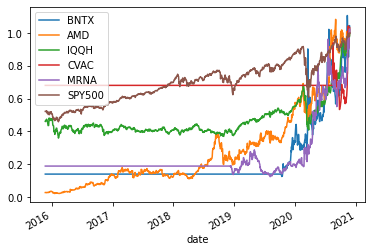

In [32]:
(close_prices/close_prices.iloc[-1]).plot()

In [33]:
close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1292 entries, 2015-11-24 to 2020-11-24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BNTX    1292 non-null   float64
 1   AMD     1292 non-null   float64
 2   IQQH    1292 non-null   float64
 3   CVAC    1292 non-null   float64
 4   MRNA    1292 non-null   float64
 5   SPY500  1292 non-null   float64
dtypes: float64(6)
memory usage: 70.7 KB


In [34]:
TOPERCENTAGE=100  #TOPERCENTAGE=1
TREASURYRATEYEARLY=0.01
BUSINESSDAYSINCALENDAR=252
INVESTDURATION=252


In [35]:
returns=pd.DataFrame({})
for name in names:
  current_returns = close_prices[name].pct_change()
  returns[name]= current_returns.iloc[1:] * TOPERCENTAGE

 

In [36]:
#drop SPY500 average
SPY=returns['SPY500']
del returns['SPY500']
names.remove('SPY500')

In [37]:
returns_p=returns.copy()


In [38]:
returns_p

,BNTX,AMD,IQQH,CVAC,MRNA
date,,,,,
2015-11-25,0.000000,1.709402,0.787402,0.000000,0.000000
2015-11-26,0.000000,0.000000,0.585938,0.000000,0.000000
2015-11-27,0.000000,-2.100840,-0.582524,0.000000,0.000000
2015-11-30,0.000000,1.287554,0.390625,0.000000,0.000000
2015-12-01,0.000000,-0.847458,0.389105,0.000000,0.000000
...,...,...,...,...,...
2020-11-18,4.037732,-0.983685,0.209644,-2.418617,-4.573269
2020-11-19,4.964617,3.634601,0.019019,0.750268,4.364945
2020-11-20,9.628147,-1.052139,1.388097,5.970745,5.217204


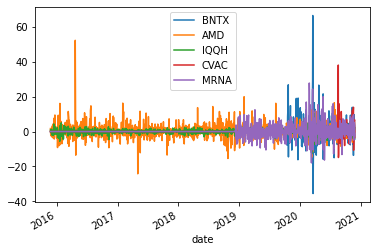

In [39]:
returns_p.plot()

In [40]:
returns

,BNTX,AMD,IQQH,CVAC,MRNA
date,,,,,
2015-11-25,0.000000,1.709402,0.787402,0.000000,0.000000
2015-11-26,0.000000,0.000000,0.585938,0.000000,0.000000
2015-11-27,0.000000,-2.100840,-0.582524,0.000000,0.000000
2015-11-30,0.000000,1.287554,0.390625,0.000000,0.000000
2015-12-01,0.000000,-0.847458,0.389105,0.000000,0.000000
...,...,...,...,...,...
2020-11-18,4.037732,-0.983685,0.209644,-2.418617,-4.573269
2020-11-19,4.964617,3.634601,0.019019,0.750268,4.364945
2020-11-20,9.628147,-1.052139,1.388097,5.970745,5.217204


In [41]:
mean_return = returns.mean()

In [42]:
mean_return

BNTX    0.225714
AMD     0.358590
IQQH    0.071086
CVAC    0.043457
MRNA    0.178256
dtype: float64

In [43]:
cov = returns.cov()
cov_np = cov.to_numpy()


In [44]:
returns

,BNTX,AMD,IQQH,CVAC,MRNA
date,,,,,
2015-11-25,0.000000,1.709402,0.787402,0.000000,0.000000
2015-11-26,0.000000,0.000000,0.585938,0.000000,0.000000
2015-11-27,0.000000,-2.100840,-0.582524,0.000000,0.000000
2015-11-30,0.000000,1.287554,0.390625,0.000000,0.000000
2015-12-01,0.000000,-0.847458,0.389105,0.000000,0.000000
...,...,...,...,...,...
2020-11-18,4.037732,-0.983685,0.209644,-2.418617,-4.573269
2020-11-19,4.964617,3.634601,0.019019,0.750268,4.364945
2020-11-20,9.628147,-1.052139,1.388097,5.970745,5.217204


In [45]:
close_prices_assets=close_prices.drop(columns=["SPY500"])

In [46]:
close_prices_assets.head()

,BNTX,AMD,IQQH,CVAC,MRNA
date,,,,,
2015-11-24,14.24,2.34,5.08,55.9,18.6
2015-11-25,14.24,2.38,5.12,55.9,18.6
2015-11-26,14.24,2.38,5.15,55.9,18.6
2015-11-27,14.24,2.33,5.12,55.9,18.6
2015-11-30,14.24,2.36,5.14,55.9,18.6


In [47]:
import numpy as np

# setting the seed allows for reproducible results
np.random.seed(123)

import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM, Flatten, Dense
from keras.models import Sequential
import keras.backend as K


from tensorflow import keras
from keras import layers

!pip install -q -U keras-tuner

import keras_tuner as kt

import pandas as pd

     |████████████████████████████████| 135 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 57.3 MB/s 


In [48]:


path_checkpoint = "model_checkpoint.h5"
es_callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5)

modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    monitor="loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)
def visualize_loss(history, title):
    loss = history.history["loss"]
    #val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    #plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()



class Model:
    def __init__(self,input_shape, output_shape):
        self.data = None
        self.model = None
        self.tuner=None
        self.input_shape=input_shape
        self.output_shape=output_shape
   
    def get_allocations(self, data: pd.DataFrame):
        '''
        Computes and returns the allocation ratios that optimize the Sharpe over the given data
        
        input: data - DataFrame of historical closing prices of various assets
        
        return: the allocations ratios for each of the given assets
        '''
        
        # data with returns
        data_w_ret = np.concatenate([ data.values[1:], data.pct_change().values[1:] ], axis=1)
        
        data = data.iloc[1:]
        self.data = tf.cast(tf.constant(data), float)
        
        if self.model is None:
            self.model = self.__build_model(data_w_ret.shape, len(data.columns))
        
        fit_predict_data = data_w_ret[np.newaxis,:]        
        history=self.model.fit(fit_predict_data, np.zeros(fit_predict_data.shape), epochs=100, shuffle=False,callbacks=[ es_callback])
        visualize_loss(history, "Training and Validation Loss")

        loss_per_epoch = history.history['loss']
        best_epoch = loss_per_epoch.index(min(loss_per_epoch)) + 1
        print('Best epoch: %d' % (best_epoch,))


        return self.model.predict(fit_predict_data)[0]
      



In [77]:

data=close_prices_assets
# data with returns
data_w_ret = np.concatenate([ data.values[1:], data.pct_change().values[1:] ], axis=1)

data = data.iloc[1:]


fit_predict_data = data_w_ret[np.newaxis,:]   

input_shape=data_w_ret.shape
output_shape=len(data.columns)

model=Model(input_shape,output_shape)
model.data = tf.cast(tf.constant(data), float)

def sharpe_loss(_, y_pred):
        # make all time-series start at 1
        data = tf.divide(model.data, model.data[0])  
        
        # value of the portfolio after allocations applied
        portfolio_values = tf.reduce_sum(tf.multiply(data, y_pred), axis=1) 
        
        portfolio_returns = (portfolio_values[1:] - portfolio_values[:-1]) / portfolio_values[:-1]  # % change formula

        sharpe = K.mean(portfolio_returns) / K.std(portfolio_returns)
        
        # since we want to maximize Sharpe, while gradient descent minimizes the loss, 
        #   we can negate Sharpe (the min of a negated function is its max)
        return -sharpe

def model_builder2(hp):
    '''
    Builds and returns the Deep Neural Network that will compute the allocation ratios
    that optimize the Sharpe Ratio of the portfolio
    
    inputs: input_shape - tuple of the input shape, outputs - the number of assets
    returns: a Deep Neural Network model
    '''
    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    model = Sequential([
        LSTM(hp_units, input_shape=input_shape),
        Flatten(),
        Dense(output_shape, activation='softmax')
    ])



    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(loss=sharpe_loss, optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model
tuner2 = kt.Hyperband(model_builder2,
                     objective='loss',
                     max_epochs=50,
                     factor=100,
                     directory='my_dir5',
                     project_name='intro_to_kt5')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)







In [57]:
np.zeros((1, len(data.columns)))

array([[0., 0., 0., 0., 0.]])

In [78]:
tuner2.search(fit_predict_data, np.zeros((1, len(data.columns))), epochs=50, callbacks=[stop_early])

Trial 2 Complete [00h 00m 44s]
loss: -0.08369877189397812

Best loss So Far: -0.08850756287574768
Total elapsed time: 00h 01m 28s


In [79]:
# Get the optimal hyperparameters
best_hps=tuner2.get_best_hyperparameters(num_trials=100)[0]

In [80]:
best_hps.values

{'units': 96,
 'learning_rate': 0.001,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [81]:
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 96 and the optimal learning rate for the optimizer
is 0.001.



In [82]:
model.model = tuner2.hypermodel.build(best_hps)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: -0.0854
Epoch 2/100
1/1 [==============================] - 0s 394ms/step - loss: -0.0859
Epoch 3/100
1/1 [==============================] - 0s 360ms/step - loss: -0.0863
Epoch 4/100
1/1 [==============================] - 0s 387ms/step - loss: -0.0865
Epoch 5/100
1/1 [==============================] - 0s 397ms/step - loss: -0.0867
Epoch 6/100
1/1 [==============================] - 0s 392ms/step - loss: -0.0868
Epoch 7/100
1/1 [==============================] - 0s 405ms/step - loss: -0.0870
Epoch 8/100
1/1 [==============================] - 0s 377ms/step - loss: -0.0870
Epoch 9/100
1/1 [==============================] - 0s 385ms/step - loss: -0.0874
Epoch 10/100
1/1 [==============================] - 0s 389ms/step - loss: -0.0876
Epoch 11/100
1/1 [==============================] - 0s 429ms/step - loss: -0.0878
Epoch 12/100
1/1 [==============================] - 0s 427ms/step - loss: -0.0880
Epoch 13/100
1/1 [==========

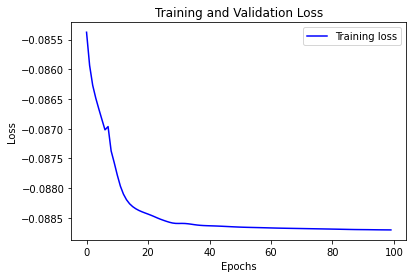

Best epoch: 100
1/1 [==============================] - 1s 543ms/step


In [83]:
best_w = model.get_allocations(pd.DataFrame(close_prices_assets))

In [84]:
D = len(mean_return)
single_asset_returns = np.zeros(D)
single_asset_risks = np.zeros(D)
for i in range(D):
  ret = mean_return[i]
  risk = np.sqrt(cov_np[i,i])

  single_asset_returns[i] = ret
  single_asset_risks[i] = risk

In [85]:
opt_risk = np.sqrt(best_w.dot(cov).dot(best_w))
opt_ret = mean_return.dot(best_w)

In [86]:
duration_days=252
TOPERCENTAGE=100

In [87]:
rsk=pd.Series(single_asset_risks,index=names,name='DAILY RISK %')
rsk['OPT_PORTFOLIO']=opt_risk
rsk=rsk.round(2)
rtr=pd.Series(single_asset_returns,index=names,name='CUMULATIVE RETURN %')
rtr['OPT_PORTFOLIO']=opt_ret
rtr=(((1 + rtr/TOPERCENTAGE)**duration_days - 1)*TOPERCENTAGE).round(2)

wgh=pd.Series(best_w,index=names,name='WEIGTHS %')
wgh['OPT_PORTFOLIO']=1
wgh=(wgh*TOPERCENTAGE).round(2)

pd.DataFrame(rtr).join(rsk).join(wgh)

,CUMULATIVE RETURN %,DAILY RISK %,WEIGTHS %
BNTX,76.50,3.99,40.48
AMD,146.46,4.07,57.81
IQQH,19.61,1.48,0.15
CVAC,11.57,1.72,0.24
MRNA,56.64,3.18,1.32
OPT_PORTFOLIO,113.40,2.93,100.00


In [88]:
sharp_of_portfolio=opt_ret/opt_risk

In [89]:
sharp_of_portfolio

0.10280486108286808